In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTh1.csv')
df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


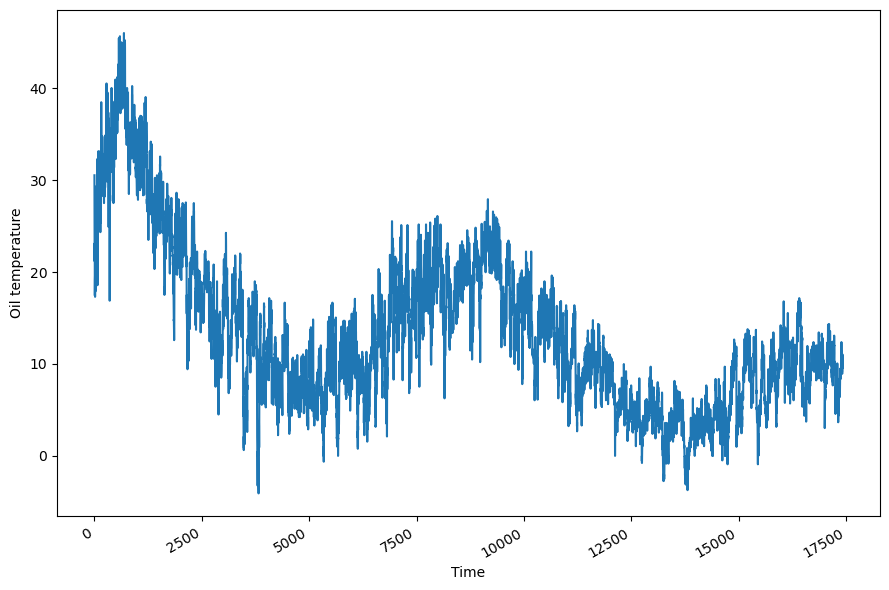

In [4]:
fig, ax = plt.subplots()

ax.plot(df['OT'])
ax.set_xlabel('Time')
ax.set_ylabel('Oil temperature')

fig.autofmt_xdate()
plt.tight_layout()

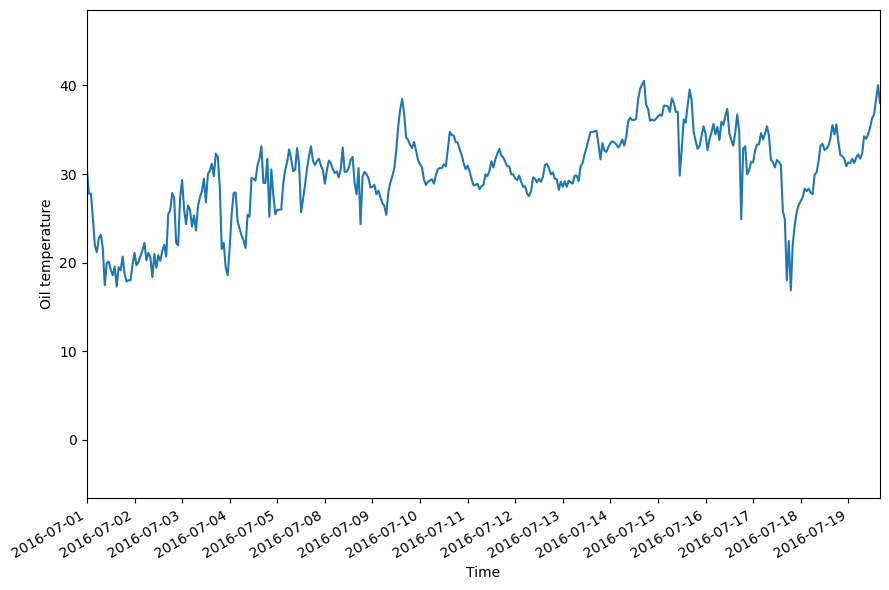

In [5]:
fig, ax = plt.subplots()

ax.plot(df['OT'])
ax.set_xlabel('Time')
ax.set_ylabel('Oil temperature')

plt.xticks(
    np.arange(0, 400, 24), 
    ['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04', '2016-07-05', '2016-07-08', '2016-07-09', '2016-07-10', '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14', '2016-07-15', '2016-07-16', '2016-07-17', '2016-07-18', '2016-07-19']
)
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

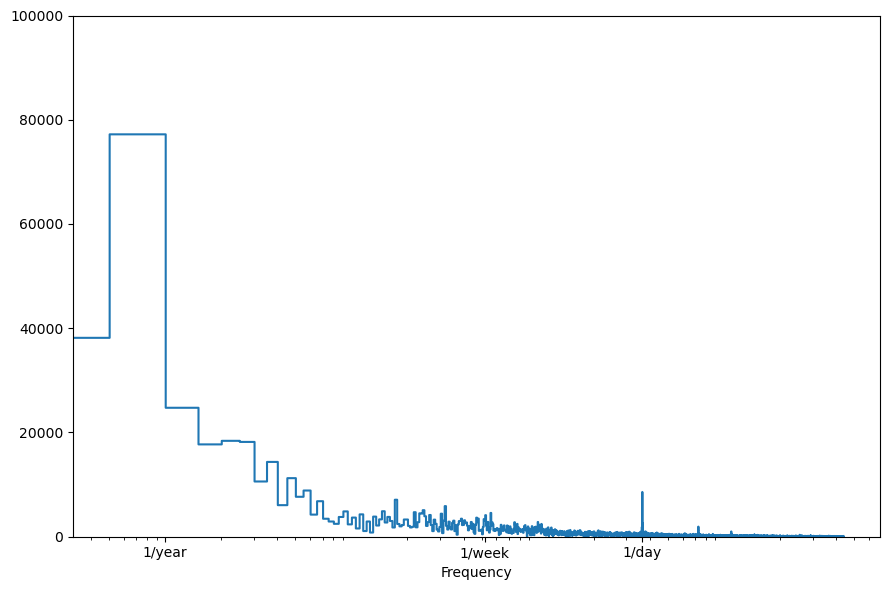

In [6]:
from tensorflow.signal import rfft

fft = rfft(df['OT'])
f_per_dataset = np.arange(0, len(fft))

n_sample_h = len(df['OT'])
hours_per_week = 24 * 7
hours_per_year = 24*365.2524
weeks_per_dataset = n_sample_h / hours_per_week
years_per_dataset = n_sample_h / hours_per_year

f_per_year = f_per_dataset / years_per_dataset

plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 52, 365.2524], ['1/year', '1/week', '1/day'])
plt.xlabel('Frequency')
plt.ylim(0, 100000)
plt.tight_layout()
plt.show()

In [7]:
import datetime

timestamp_s = pd.to_datetime(df['date']).map(datetime.datetime.timestamp)

day = 24*60*60
year = (365.2425)*day

df['day_sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['day_cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['year_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['year_cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [8]:
df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,day_sin,day_cos,year_sin,year_cos
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,0.866025,5.000000e-01,0.010486,-0.999945
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,0.965926,2.588190e-01,0.009770,-0.999952
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001,1.000000,7.440628e-12,0.009053,-0.999959
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001,0.965926,-2.588190e-01,0.008336,-0.999965
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000,0.866025,-5.000000e-01,0.007619,-0.999971


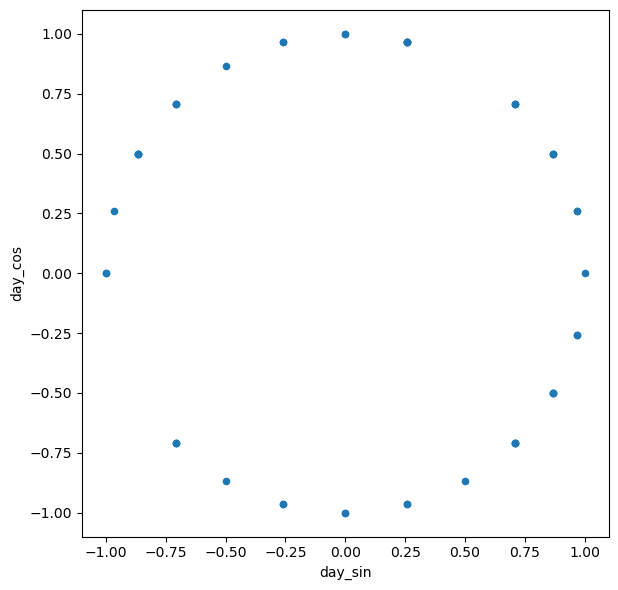

In [9]:
df.sample(50).plot.scatter('day_sin','day_cos').set_aspect('equal');
plt.tight_layout()

In [10]:
df = df.drop(['date'], axis=1)

n = len(df)

# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

train_df.shape, val_df.shape, test_df.shape

((12194, 11), (3484, 11), (1742, 11))

In [11]:
MULL_max_train = np.max(train_df['MULL'])
MULL_min_train = np.min(train_df['MULL'])
MULL_max_test = np.max(test_df['MULL'])
MULL_min_test = np.min(test_df['MULL'])

OT_max_train = np.max(train_df['OT'])
OT_min_train = np.min(train_df['OT'])
OT_max_test = np.max(test_df['OT'])
OT_min_test = np.min(test_df['OT'])

print(MULL_max_train, MULL_min_train, MULL_max_test, MULL_min_test)
print(OT_max_train, OT_min_train, OT_max_test, OT_min_test)

7.568999767303468 -5.934000015258789 4.690999984741211 -3.3399999141693115
46.00699996948242 -4.079999923706056 17.165000915527347 3.025000095367432


In [12]:
from sklearn.preprocessing import MinMaxScaler

train_scaler = MinMaxScaler()
test_scaler = MinMaxScaler()

train_scaler.fit(train_df[train_df.columns[:-4]])
test_scaler.fit(test_df[test_df.columns[:-4]])


train_df[train_df.columns[:-4]] = train_scaler.transform(train_df[train_df.columns[:-4]])
val_df[val_df.columns[:-4]] = train_scaler.transform(val_df[val_df.columns[:-4]])
test_df[test_df.columns[:-4]] = test_scaler.transform(test_df[test_df.columns[:-4]])

In [13]:
train_df.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,day_sin,day_cos,year_sin,year_cos
0,0.588227,0.454943,0.599461,0.473673,0.556576,0.613765,0.691018,0.866025,5.000000e-01,0.010486,-0.999945
1,0.585130,0.459449,0.596738,0.471006,0.550279,0.620783,0.636233,0.965926,2.588190e-01,0.009770,-0.999952
2,0.572743,0.436920,0.591319,0.465748,0.512595,0.586144,0.636233,1.000000,7.440628e-12,0.009053,-0.999959
3,0.571194,0.450437,0.591319,0.468414,0.515693,0.599955,0.581468,0.965926,-2.588190e-01,0.008336,-0.999965
4,0.577388,0.450437,0.596738,0.473673,0.521990,0.599955,0.519656,0.866025,-5.000000e-01,0.007619,-0.999971


In [14]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HUFL,12194.0,0.625619,0.146785,0.0,0.591324,6.485937e-01,0.710532,1.0
HULL,12194.0,0.451445,0.142104,0.0,0.342367,4.414257e-01,0.549563,1.0
MUFL,12194.0,0.674532,0.156663,0.0,0.650094,7.070633e-01,0.768536,1.0
MULL,12194.0,0.490824,0.142757,0.0,0.386803,4.921129e-01,0.600015,1.0
LUFL,12194.0,0.423712,0.122714,0.0,0.345963,3.993393e-01,0.468511,1.0
LULL,12194.0,0.487091,0.149976,0.0,0.455286,5.241114e-01,0.579352,1.0
OT,12194.0,0.406786,0.166686,0.0,0.282309,3.834328e-01,0.494380,1.0
day_sin,12194.0,0.000147,0.707171,-1.0,-0.707107,-1.910140e-14,0.707107,1.0
day_cos,12194.0,0.000041,0.707100,-1.0,-0.707107,-2.548329e-14,0.707107,1.0
year_sin,12194.0,-0.202106,0.697644,-1.0,-0.854478,-3.946346e-01,0.460379,1.0


In [15]:
train_df.to_csv('data/train.csv', header=True, index=False)
val_df.to_csv('data/val.csv', header=True, index=False)
test_df.to_csv('data/test.csv', header=True, index=False)